In [1]:
%cd DS-Unit-2-Build-Week

[WinError 2] The system cannot find the file specified: 'DS-Unit-2-Build-Week'
c:\Users\jblac\OneDrive\Documents\Lambda-JOSH-PC\DS-Unit-2-Build-Week


In [2]:
ls

Volume in drive C is SSD
 Volume Serial Number is E288-DA6D

 Directory of c:\Users\jblac\OneDrive\Documents\Lambda-JOSH-PC\DS-Unit-2-Build-Week

04/22/2020  12:26 PM    <DIR>          .
04/22/2020  12:26 PM    <DIR>          ..
05/01/2020  10:36 AM           648,807 build-week-scrap.ipynb
04/22/2020  12:26 PM                 0 scratch.ipynb
04/21/2020  01:30 PM    <DIR>          wine-deep-learning
04/21/2020  02:14 PM        49,784,334 winemag-data_first150k.csv
04/20/2020  02:57 PM        52,908,706 winemag-data-130k-v2.csv
04/20/2020  02:57 PM        79,279,294 winemag-data-130k-v2.json
               5 File(s)    182,621,141 bytes
               3 Dir(s)  58,815,836,160 bytes free


In [3]:
from glob import glob

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix





for filename in glob('*.csv'):
    print(filename)

winemag-data-130k-v2.csv
winemag-data_first150k.csv


In [4]:
 df30 = pd.read_csv('winemag-data-130k-v2.csv')
 df50 = pd.read_csv('winemag-data_first150k.csv')

In [5]:
df30.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [6]:
df30.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [7]:
df30 = df30.drop('Unnamed: 0', axis=1)

In [8]:
df50.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [9]:
df50 = df50.drop('Unnamed: 0', axis=1)

In [10]:
# I'm curious if top 150k is actually the top 150k, so let's describe the points column on both dataframes
df30['points'].value_counts()

88     17207
87     16933
90     15410
86     12600
89     12226
91     11359
92      9613
85      9530
93      6489
84      6480
94      3758
83      3025
82      1836
95      1535
81       692
96       523
80       397
97       229
98        77
99        33
100       19
Name: points, dtype: int64

In [11]:
# That one contains 88-100, what about top 150k
df50['points'].value_counts()

87     20747
88     17871
90     15973
86     15573
89     12921
85     12411
84     10708
91     10536
92      9241
83      6048
93      6017
82      4041
94      3462
95      1716
81      1502
80       898
96       695
97       365
98       131
99        50
100       24
Name: points, dtype: int64

In [12]:
# Looks pretty similar, maybe we'll just work with the 150k df
# scratch that, going to use the 130k dataframe, since it has columns to prevent duplicate entries

# Renaming for ease
df = df50.copy()

In [13]:
# random forest / coefficients
# permutation importances

In [14]:
df['points'].value_counts(sort=False)

80       898
81      1502
82      4041
83      6048
84     10708
85     12411
86     15573
87     20747
88     17871
89     12921
90     15973
91     10536
92      9241
93      6017
94      3462
95      1716
96       695
97       365
98       131
99        50
100       24
Name: points, dtype: int64

In [15]:
df['price'].value_counts(sort=False)

48.0     1365
32.0     2197
128.0      14
121.0       1
770.0       2
         ... 
764.0       1
46.0      453
475.0       1
39.0      942
596.0       2
Name: price, Length: 357, dtype: int64

In [16]:
df['price'].isnull().sum()

13695

In [34]:
#

# train, test = train_test_split(df, test_size=0.1)
# train, val = train_test_split(train, test_size=0.1) 

# train, test = train_test_split(cal_pinot, test_size=0.1)
# train, val = train_test_split(train, test_size=0.1) 

train, test = train_test_split(tusc_sang, test_size=0.1)
train, val = train_test_split(train, test_size=0.1)


In [35]:
train.shape, val.shape, test.shape

((2050, 10), (228, 10), (254, 10))

In [36]:
def wrangle(X):
    """Wrangle train, and test sets in the same way"""

    # copy dataframe to minimize casualities
    X = X.copy()

    # since points and price are cardinal we can't replace them with 0
    # because that will affect the mean, mode, median so we drop
    X = X[X['points'].notna()]
    X = X[X['price'].notna()]

    # only nans left are categorical, so we don't care about mean, mode, median
    X.fillna('Missing', inplace=True)

    return X

In [37]:
train.shape

(2050, 10)

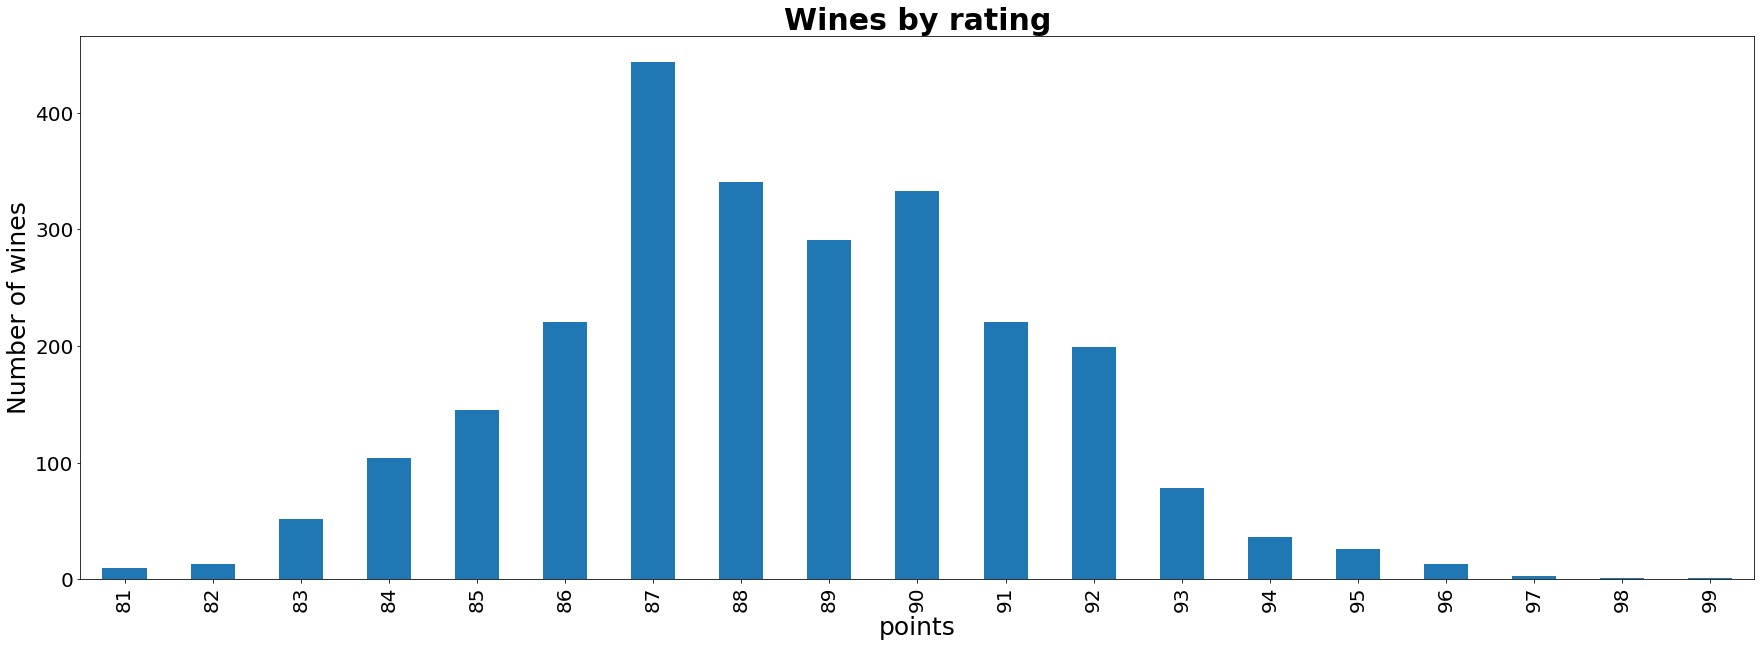

In [38]:
fig, ax = plt.subplots(figsize=(30,10))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax.set_title('Wines by rating', fontweight="bold", size=30)
ax.set_ylabel('Number of wines', fontsize = 25)
ax.set_xlabel('Points', fontsize = 25)

# df.groupby(['points']).count()['description'].plot(ax=ax, kind='bar')
# cal_pinot.groupby(['points']).count()['description'].plot(ax=ax, kind='bar')
tusc_sang.groupby(['points']).count()['description'].plot(ax=ax, kind='bar')

In [39]:
train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [40]:
target = 'price'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
y_train.value_counts(normalize=False)
X_test = test

In [41]:
majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)
# y_pred

In [42]:
# ORDINAL ENCODER + RANDOM FOREST

# # transpose before pipeline
# X_train = X_train.transpose()
# X_val = X_val.transpose()

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('Validation accuracy: ', pipeline.score(X_val, y_val))

# Validation Accuracy:  0.2045782635594968 (price as target)
# Validation accuracy:  0.2602520400785043 (points as target)
# Validation accuracy:  0.2556390977443609 (only country, points, points_simplified)
# Validation accuracy:  0.5462726109994519 (points as target, description_length added)
# Validation accuracy:  0.5741556534508077 (price as target, cal_pinot dataframe - viable candidate for app?)

Validation accuracy:  0.538860103626943


In [43]:
# Testing with a linear regression, just because

from sklearn.linear_model import LinearRegression

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    LinearRegression()
)

pipeline.fit(X_train, y_train)
print('Validation accuracy: ', pipeline.score(X_val, y_val))

# RESULTS
# Validation accuracy:  0.3468303581123204 (cal_pinot, price as target)

Validation accuracy:  0.41119607757213017


In [44]:
# Obviously need to approach this from a different angle

# Let's try making a way for each score to be generalized a litle more, looking for the best correlation to rating



In [45]:
# df = df.assign(description_length = df['description'].apply(len))
# df.info()
# df.head()

# cal_pinot = cal_pinot.assign(description_length = cal_pinot['description'].apply(len))
# cal_pinot.info()
# cal_pinot.head()

tusc_sang = tusc_sang.assign(description_length = tusc_sang['description'].apply(len))
tusc_sang.info()
tusc_sang.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2532 entries, 32 to 150799
Data columns (total 11 columns):
country               2532 non-null object
description           2532 non-null object
designation           1521 non-null object
points                2532 non-null int64
price                 2113 non-null float64
province              2532 non-null object
region_1              2532 non-null object
region_2              0 non-null object
variety               2532 non-null object
winery                2532 non-null object
description_length    2532 non-null int64
dtypes: float64(1), int64(2), object(8)
memory usage: 237.4+ KB


,country,description,designation,points,price,province,region_1,region_2,variety,winery,description_length
32,Italy,"Underbrush, scorched earth, menthol and plum s...",Vigna Piaggia,90,NaN,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Abbadia Ardenga,293
35,Italy,"Forest floor, tilled soil, mature berry and a ...",Riserva,90,135.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Carillon,231
37,Italy,"Aromas of forest floor, violet, red berry and ...",NaN,90,29.0,Tuscany,Vino Nobile di Montepulciano,NaN,Sangiovese,Avignonesi,265
38,Italy,"This has a charming nose that boasts rose, vio...",NaN,90,23.0,Tuscany,Chianti Classico,NaN,Sangiovese,Casina di Cornia,277
46,Italy,"Sunbaked earth, ripe berry, baking spice and a...",Poggio alle Mura,90,90.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Banfi,203


In [46]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [49]:
# fig, ax = plt.subplots(figsize=(30,10))
# sns.boxplot(x='points', y='description_length', data=df)
# plt.xticks(fontsize=20) # X Ticks
# plt.yticks(fontsize=20) # Y Ticks
# ax.set_title('Description Length per Points', fontweight="bold", size=25) # Title
# ax.set_ylabel('Description Length', fontsize = 25) # Y label
# ax.set_xlabel('Points', fontsize = 25) # X label
# plt.show()

# fig, ax = plt.subplots(figsize=(30,10))
# sns.boxplot(x='points', y='price', data=cal_pinot)
# plt.xticks(fontsize=20) # X Ticks
# plt.yticks(fontsize=20) # Y Ticks
# ax.set_title('Price per Points', fontweight="bold", size=25) # Title
# ax.set_ylabel('Price ($)', fontsize = 25) # Y label
# ax.set_xlabel('Points', fontsize = 25) # X label
# plt.show()

fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='points', y='price', data=tusc_sang)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Price per Points', fontweight="bold", size=25) # Title
ax.set_ylabel('Price ($)', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
plt.show()

TypeError: set() takes no keyword arguments

In [30]:
# We can maybe narrow this down a little more:

def transform_points_simplified(points):
    if points < 84:
        return 1
    elif points >= 84 and points < 88:
        return 2 
    elif points >= 88 and points < 92:
        return 3 
    elif points >= 92 and points < 96:
        return 4 
    else:
        return 5

# Make a new column called 'points_simplified' using this function
df = df.assign(points_simplified = df['points'].apply(transform_points_simplified))
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,description_length,points_simplified
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,355,5
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,318,5
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,280,5
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,386,5
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,376,4


In [31]:
df = df[['description', 'points', 'description_length', 'points_simplified']].copy()

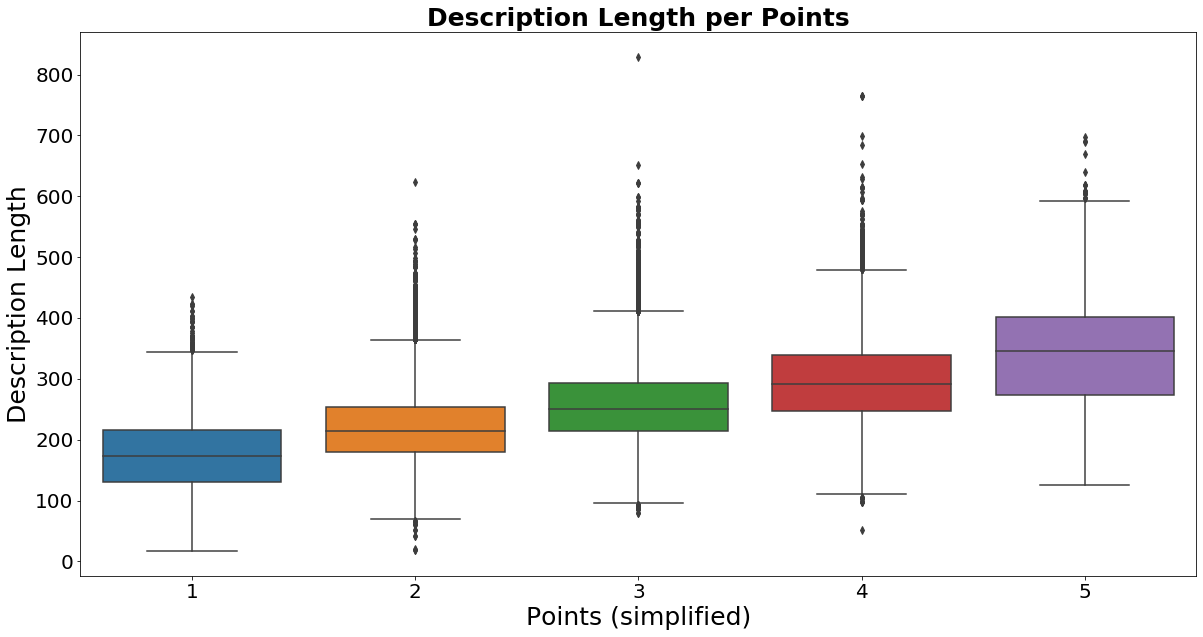

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x='points_simplified', y='description_length', data=df)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Description Length per Points', fontweight="bold", size=25) # Title
ax.set_ylabel('Description Length', fontsize = 25) # Y label
ax.set_xlabel('Points (simplified)', fontsize = 25) # X label
plt.show()

In [33]:
X = df['description']
y = df['points_simplified']

vectorizer = CountVectorizer()
vectorizer.fit(X)
#print(vectorizer.vocabulary_)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [34]:
X = vectorizer.transform(X)
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)
# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Shape of Sparse Matrix:  (150930, 30748)
Amount of Non-Zero occurrences:  5162508
Density: 0.11124187317155815


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Testing the model
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

precision    recall  f1-score   support

           1       0.98      0.71      0.83      1221
           2       0.80      0.92      0.86      5842
           3       0.80      0.84      0.82      5815
           4       0.99      0.60      0.75      2072
           5       1.00      0.60      0.75       143

    accuracy                           0.83     15093
   macro avg       0.91      0.74      0.80     15093
weighted avg       0.84      0.83      0.82     15093



In [30]:
condition1 = df[df['province'] == 'Tuscany']

In [32]:
condition1['variety'].describe()

count           7281
unique            40
top       Sangiovese
freq            2532
Name: variety, dtype: object

In [33]:
tusc_sang = condition1[condition1['variety'] == 'Sangiovese']

In [93]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.5245998544925428


In [50]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='blue');

KeyError: 'randomforestclassifier'